 ### **Convolutional Neural Network for cancer detection**

The images are classified into two classes:
1. benign(The tumor doesn’t contain cancerous cells)

2. maligant(The tumor contains cancerous cells)

Our model uses convolutional neural networks to predict the tumour as either benign or maligant


###Importing libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

### Part 1 - Data Preprocessing

 Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('cancer_dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 2637 images belonging to 2 classes.


 Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('cancer_dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 660 images belonging to 2 classes.


###Part 2 - Building the CNN

 Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

**Step 1 - Convolution**

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
tf.keras.layers.BatchNormalization()

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

 Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
tf.keras.layers.BatchNormalization()

Adding third Convulution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
tf.keras.layers.BatchNormalization()

Adding fouth convolution layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
tf.keras.layers.BatchNormalization()

**Step 2 - Max Pooling**

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Step 3 - Flattening**

In [ ]:
cnn.add(tf.keras.layers.Flatten())

Flattening layer 2

In [ ]:
tf.keras.layers.Dense(4096, activation='relu')

Flattening layer 3

In [ ]:
tf.keras.layers.Dense(4096, activation='relu')

**Step 4 - Full Connection**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Step 5 - Output Layer**

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

**Compiling the CNN**

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the CNN on the Training set and evaluating it on the Test set**

In [ ]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
83/83 [==============================] - 60s 708ms/step - loss: 0.6596 - accuracy: 0.6049 - val_loss: 0.5719 - val_accuracy: 0.6439
Epoch 2/50
83/83 [==============================] - 21s 256ms/step - loss: 0.5136 - accuracy: 0.7493 - val_loss: 0.4465 - val_accuracy: 0.7606
Epoch 3/50
83/83 [==============================] - 20s 244ms/step - loss: 0.4789 - accuracy: 0.7619 - val_loss: 0.4040 - val_accuracy: 0.7879
Epoch 4/50
83/83 [==============================] - 20s 242ms/step - loss: 0.4185 - accuracy: 0.7922 - val_loss: 0.4342 - val_accuracy: 0.7970
Epoch 5/50
83/83 [==============================] - 22s 264ms/step - loss: 0.4420 - accuracy: 0.7876 - val_loss: 0.4248 - val_accuracy: 0.7939
Epoch 6/50
83/83 [==============================] - 20s 241ms/step - loss: 0.4069 - accuracy: 0.7964 - val_loss: 0.3590 - val_accuracy: 0.8318
Epoch 7/50
83/83 [==============================] - 22s 267ms/step - loss: 0.3989 - accuracy: 0.8043 - val_loss: 0.3713 - val_accuracy: 0.8303

**Plotting accuracy and loss graph**

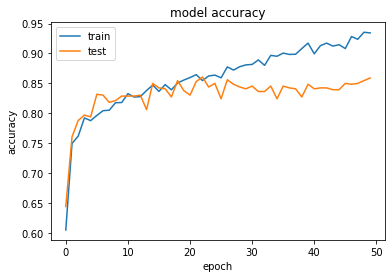

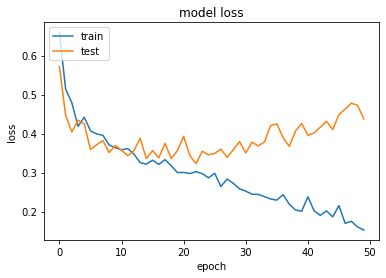

In [ ]:
#summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Making Single Prediction

In [ ]:
#MAKING SINGLE PREDICTION
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test_image = load_img('cancer_dataset/single_prediction/benign2.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'maligant'
else:
  prediction = 'benign'

1/1 [==============================] - 0s 28ms/step


In [ ]:
print(prediction)

benign


### Conclusion

The neural network is able to produce an accuracy of 0.8591(~86% accuracy) to predict two different classes of images related to skin cancer tumour.